In [1]:
import fitle as fl
import numpy as np

In [2]:
a = fl.Param.positive('a')
b = fl.Param(4,7)('b')

linear_model = a * fl.INPUT + b


In [3]:
data_x = np.array([-2,-1,0,1,2])
data_y = np.array([5,5,6,6,7])
cost = fl.Cost.MSE(data_x, data_y)

In [4]:
model_cost = linear_model | cost
model_cost

sum(([5 5 6 6 7] - (a=1 * [-2 -1  0  1  2] + b=5.5)) ** 2)

In [5]:
model_cost()

np.float64(3.25)

In [7]:
fit_result = fl.fit(model_cost)
fit_result

<FitResult fval=0.300, success=True>
a: 0.5009 ± 0.31
b: 5.798 ± 0.44

In [10]:
import mplhep
mplhep.style.set_style(mplhep.style.LHCb2)
import matplotlib.pyplot as plt

/var/folders/wh/rw_1ch7s07xbb_3pd5s2yfhw0000gn/T/ipykernel_25862/384357916.py:2: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  mplhep.style.set_style(mplhep.style.LHCb2)


0.5009093943620809 0.3104597898991823
{'a': 0.3104597898991823, 'b': 0.44029150148189977}


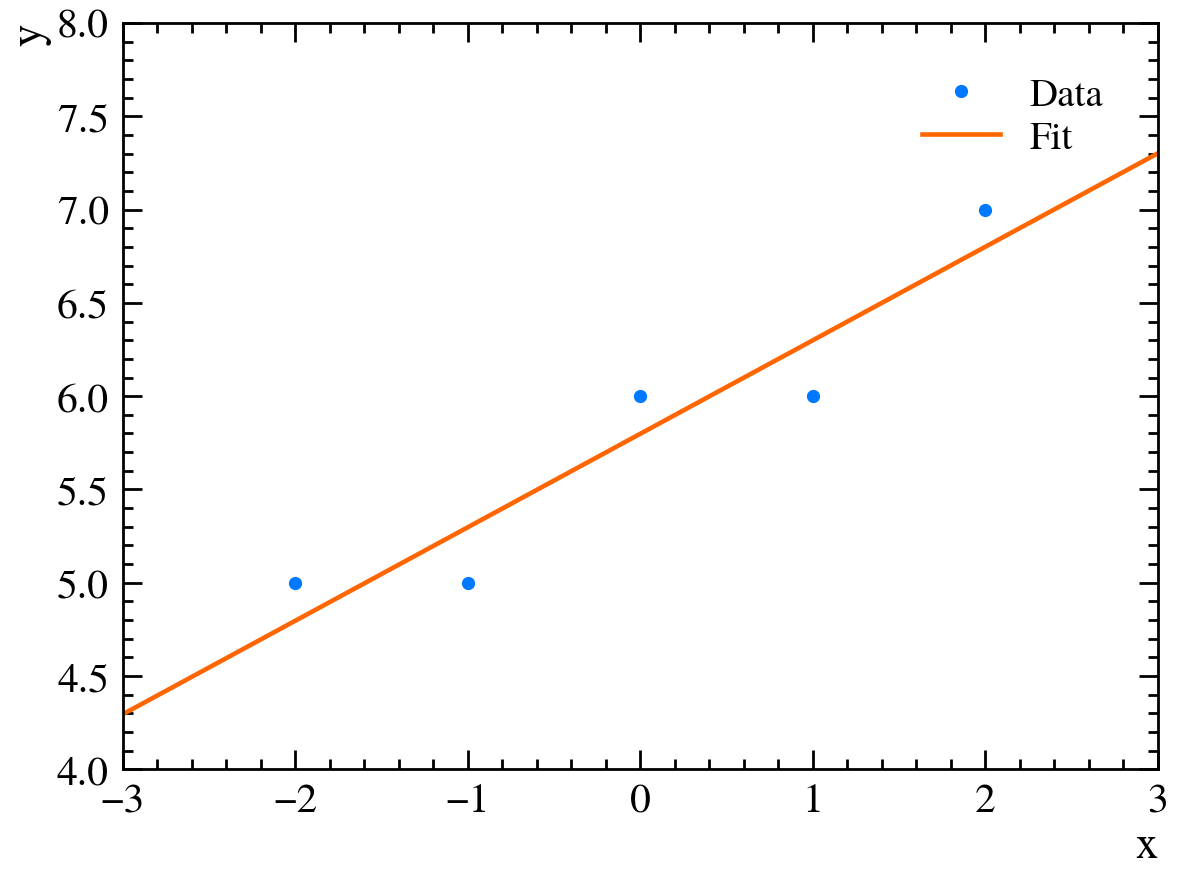

In [14]:
plt.plot(data_x, data_y,label='Data',linestyle='',marker='.')
plt.plot([-5,5], linear_model(np.array([-5,5])),label="Fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis([-3,3,4,8])

print(a.value, a.error)
print(fit_result.errors)

In [36]:
def crystalball(alpha, n, mu, sigma):
        n_over_alpha = n/alpha
        exp = np.exp(-0.5*alpha ** 2)
        A = (n_over_alpha)**n*exp
        B =  n_over_alpha - alpha
        C = n_over_alpha/(n-1)*exp
        D = np.sqrt(0.5*np.pi)*(1 + fl.Model(lambda a: scipy.special.erf(a), [alpha/np.sqrt(2)]))
        N = 1/(sigma*(C + D))

        z = (fl.INPUT - mu)/sigma
    
        return np.where(z > -alpha, 
                  N*np.exp(-0.5*z**2),
                  N*A*(B - z)**-n
                 )
                 

In [37]:
crystalball(fl.Param('alpha'),fl.Param('n'),fl.Param('mu'),fl.Param('sigma'))

where((INPUT - mu=0) / sigma=0 > -alpha=0, 1 / (sigma=0 * (n=0 / alpha=0 / (n=0 - 1) * exp(-0.5 * alpha=0 ** 2) + 1.2533141373155001 * (1 + λ(alpha=0 / 1.4142135623730951)))) * exp(-0.5 * ((INPUT - mu=0) / sigma=0) ** 2), 1 / (sigma=0 * (n=0 / alpha=0 / (n=0 - 1) * exp(-0.5 * alpha=0 ** 2) + 1.2533141373155001 * (1 + λ(alpha=0 / 1.4142135623730951)))) * ((n=0 / alpha=0) ** n=0 * exp(-0.5 * alpha=0 ** 2)) * (n=0 / alpha=0 - alpha=0 - (INPUT - mu=0) / sigma=0) ** -n=0)